In [11]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [12]:
def preprocess_text(input_text):
    words = word_tokenize(input_text)
    words = [word.lower() for word in words]
    words = [word for word in words if word.isalnum()]
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [13]:
def extract_top_keywords(input_text, num_keywords=5):
    preprocessed_text = preprocess_text(input_text)
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([preprocessed_text])
    feature_names = vectorizer.get_feature_names_out()
    
    svd = TruncatedSVD(n_components=num_keywords)  # Use TruncatedSVD for dimensionality reduction
    tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
    
    top_indices = tfidf_matrix_reduced[0].argsort()[::-1]
    top_keywords = [feature_names[index] for index in top_indices]
    
    return top_keywords

C:\Python3\lib\site-packages\sklearn\decomposition\_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Top Keywords: ['ai']


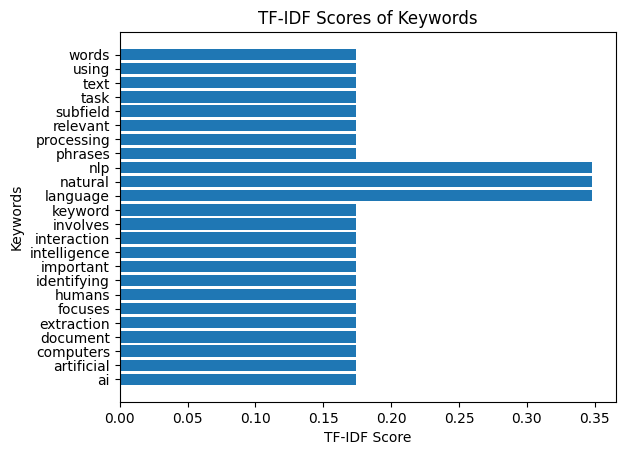

In [14]:
if __name__ == "__main__":
    input_text = """
    Natural language processing (NLP) is a subfield of artificial intelligence (AI) 
    that focuses on the interaction between humans and computers using natural 
    language. Keyword extraction is an important task in NLP. It involves 
    identifying the most relevant words or phrases in a text document.
    """

    top_keywords = extract_top_keywords(input_text)
    print("Top Keywords:", top_keywords)

    # Visualization: Bar chart of TF-IDF scores
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([preprocess_text(input_text)])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]

    plt.barh(range(len(feature_names)), tfidf_scores, align='center')
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Keywords')
    plt.title('TF-IDF Scores of Keywords')
    plt.show()